In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)  # Show all columns

# Optional: Set the display width to ensure all columns fit in the view
pd.set_option('display.width', 1000)

df = pd.read_csv('col_and_weather2.csv')

C:\Users\dougl\AppData\Local\Temp\ipykernel_2964\1801796490.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('col_and_weather2.csv')


In [3]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df['CRASH YEAR'] = df['CRASH DATE'].dt.year

In [5]:
print(df.dtypes)

Unnamed: 0.1                              int64
Unnamed: 0                                int64
COLLISION_ID                              int64
CRASH DATE                       datetime64[ns]
CRASH TIME                               object
CRASH HOUR                                int64
CRASH DAY                                object
CRASH WEEK                                int64
CRASH MONTH                               int64
CRASH SEASON                             object
is_weekend                                 bool
is_holiday                                 bool
holiday_name                             object
LATITUDE                                float64
LONGITUDE                               float64
ROAD                                     object
NEIGHBOURHOOD                            object
BOROUGH                                  object
ZIP CODE                                float64
CLUSTER NAME                             object
NUMBER OF PERSONS INJURED               

In [6]:
print(df.isnull().sum())

Unnamed: 0.1                           0
Unnamed: 0                             0
COLLISION_ID                           0
CRASH DATE                             0
CRASH TIME                             0
CRASH HOUR                             0
CRASH DAY                              0
CRASH WEEK                             0
CRASH MONTH                            0
CRASH SEASON                           0
is_weekend                             0
is_holiday                             0
holiday_name                     1232907
LATITUDE                               0
LONGITUDE                              0
ROAD                                2398
NEIGHBOURHOOD                     436627
BOROUGH                                0
ZIP CODE                               0
CLUSTER NAME                           0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIS

In [7]:
cols_to_drop = ['CRASH DATE','CRASH TIME','PUBLIC_PROPERTY_DAMAGE_1','PUBLIC_PROPERTY_DAMAGE_2','PUBLIC_PROPERTY_DAMAGE_3','PUBLIC_PROPERTY_DAMAGE_4', 'PUBLIC_PROPERTY_DAMAGE_5',
                'PUBLIC_PROPERTY_DAMAGE_TYPE_1','PUBLIC_PROPERTY_DAMAGE_TYPE_2','PUBLIC_PROPERTY_DAMAGE_TYPE_3','PUBLIC_PROPERTY_DAMAGE_TYPE_4', 'PUBLIC_PROPERTY_DAMAGE_TYPE_5',
                'VEHICLE_MAKE_1', 'VEHICLE_MAKE_2', 'VEHICLE_MAKE_3', 'VEHICLE_MAKE_4', 'VEHICLE_MAKE_5',
                'STATE_REGISTRATION_1','STATE_REGISTRATION_2','STATE_REGISTRATION_3','STATE_REGISTRATION_4','STATE_REGISTRATION_5',
                'VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3','VEHICLE_DAMAGE_4','VEHICLE_DAMAGE_5',
                'POINT_OF_IMPACT_2','POINT_OF_IMPACT_3','POINT_OF_IMPACT_4','POINT_OF_IMPACT_5',
                'TRAVEL_DIRECTION_2','TRAVEL_DIRECTION_3','TRAVEL_DIRECTION_4' ,'TRAVEL_DIRECTION_5',
                'PRE_CRASH_2','PRE_CRASH_3','PRE_CRASH_4','PRE_CRASH_5',
                'DRIVER_SEX_1','DRIVER_SEX_2','DRIVER_SEX_3','DRIVER_SEX_4','DRIVER_SEX_5',
                'DRIVER_LICENSE_STATUS_1','DRIVER_LICENSE_STATUS_2','DRIVER_LICENSE_STATUS_3','DRIVER_LICENSE_STATUS_4','DRIVER_LICENSE_STATUS_5',
                'CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5',
                'ROAD','NEIGHBOURHOOD','holiday_name','CRASH SEASON','revision_status','BOROUGH', 'Unnamed: 0.1','Unnamed: 0','COLLISION_ID',
                'max_uv','ghi','dni','dhi','rh','slp','wind_spd','wind_dir','ts','t_solar_rad','t_dhi','t_dni','t_ghi','min_temp_ts','max_wind_spd_ts','max_temp_ts',
                'ZIP CODE','precip_gpm','max_wind_dir','solar_rad','max_ghi','max_dni','max_dhi','pres','wind_gust_spd']
df = df.drop(columns=cols_to_drop) 

In [8]:
df['min_temp'].value_counts()

min_temp
 21.0    36442
 22.0    28604
 23.0    26273
 3.0     21858
 20.0    21792
         ...  
 14.6      213
 22.3      213
 16.5      211
 4.3       204
-9.3       156
Name: count, Length: 273, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
targets = ['HAS_FATALITY_OR_INJURY', 'HAS_INJURY', 'HAS_FATALITY', 'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED',]
# Define the features and target variable
X = df.drop(columns=targets)  # Adjust the features as needed
y = df['HAS_FATALITY_OR_INJURY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.dtypes

CRASH HOUR                         int64
CRASH DAY                         object
CRASH WEEK                         int64
CRASH MONTH                        int64
is_weekend                          bool
is_holiday                          bool
LATITUDE                         float64
LONGITUDE                        float64
CLUSTER NAME                      object
VEHICLE_COUNT_ESTIMATE             int64
CONTRIBUTING FACTOR VEHICLE 1     object
POINT_OF_IMPACT_1                 object
PRE_CRASH_1                       object
TRAVEL_DIRECTION_1                object
VEHICLE_DAMAGE_1                  object
clouds                             int64
dewpt                            float64
max_temp                         float64
max_wind_spd                     float64
min_temp                         float64
precip                           float64
snow                             float64
snow_depth                       float64
temp                             float64
CRASH YEAR      

In [11]:
X_train['is_weekend'] = X_train['is_weekend'].astype(int)
X_train['is_holiday'] = X_train['is_holiday'].astype(int)



X_train = pd.get_dummies(X_train, drop_first=True)

In [21]:
X_train.dtypes

CRASH HOUR                                                       int64
CRASH WEEK                                                       int64
CRASH MONTH                                                      int64
is_weekend                                                       int64
is_holiday                                                       int64
LATITUDE                                                       float64
LONGITUDE                                                      float64
VEHICLE_COUNT_ESTIMATE                                           int64
clouds                                                           int64
dewpt                                                          float64
max_temp                                                       float64
max_wind_spd                                                   float64
min_temp                                                       float64
precip                                                         float64
snow  

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Ensure X_test has the same columns as X_train, filling missing columns with 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7648
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86    187765
           1       0.62      0.23      0.34     65227

    accuracy                           0.76    252992
   macro avg       0.70      0.59      0.60    252992
weighted avg       0.74      0.76      0.72    252992

Confusion Matrix:
[[178195   9570]
 [ 49929  15298]]


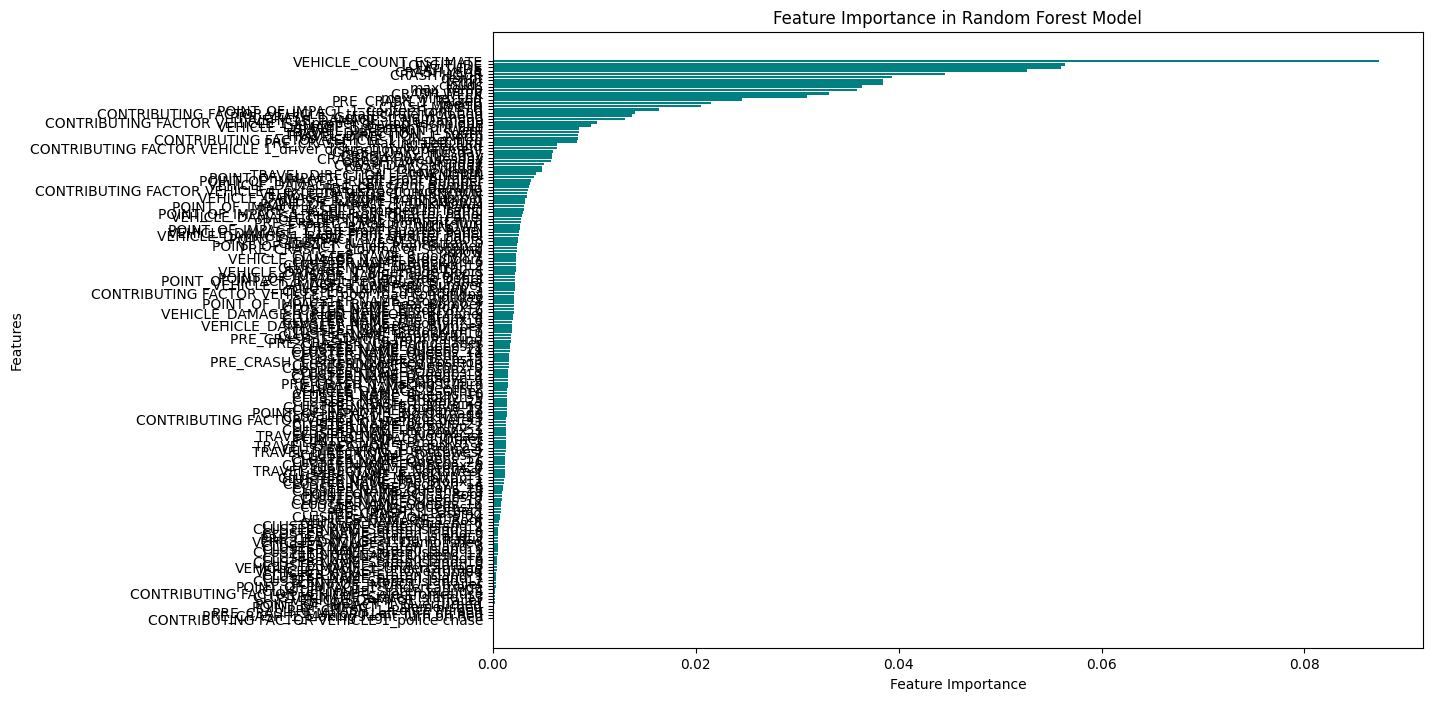

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [18]:
X_train_clean, y_train_clean = X_train.dropna(), y_train[X_train.notna().all(axis=1)]

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Remove rows with missing values in X_train and corresponding rows in y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

# Initialize resampling methods
oversample = RandomOverSampler()
undersample = RandomUnderSampler()
smote = SMOTE()

results = []

sampling_methods = {
    "Oversampling": oversample,
    "Undersampling": undersample,
    "SMOTE": smote
}

# Train and evaluate the model on each resampled dataset
for method, sampler in sampling_methods.items():
    X_res, y_res = sampler.fit_resample(X_train_clean, y_train_clean)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_res, y_res)
    
    y_pred = model.predict(X_test)
    
    # Store the results
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    matrix = confusion_matrix(y_test, y_pred)
    
    results.append({
        "Method": method,
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": matrix
    })

for result in results:
    print(f"Method: {result['Method']}\n")
    print(f"Accuracy: {result['Accuracy']}\n")
    print(f"Classification Report:\n{result['Classification Report']}\n")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")
    print("-" * 50)

Method: Oversampling

Accuracy: 0.7472884518087528

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      0.87      0.84    187765
     Class 1       0.51      0.39      0.45     65227

    accuracy                           0.75    252992
   macro avg       0.66      0.63      0.64    252992
weighted avg       0.73      0.75      0.74    252992


Confusion Matrix:
[[163320  24445]
 [ 39489  25738]]

--------------------------------------------------
Method: Undersampling

Accuracy: 0.6734165507209714

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.67      0.75    187765
     Class 1       0.42      0.68      0.52     65227

    accuracy                           0.67    252992
   macro avg       0.64      0.67      0.63    252992
weighted avg       0.74      0.67      0.69    252992


Confusion Matrix:
[[126303  61462]
 [ 21161  44066]]

----------------------------------